# Project-Images
#### *Analyzing images with python* 

#### Author: Jose Cesario Pinto
#### Semester: Spring 2020
#### Project area: Agronomy
#### Date: May 6th 2020

# Final project

#### The script will be divided in 5 main steps:

#### 1. Importing images.jpeg;
#### 2. Standardize cropped images for analysis; 
#### 3. Getting data from the images;
#### 4. Combining the rgb values in the output;
#### 5. Plotting the relation between oxygen and pixels.

In [55]:
# Import modules 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import cv2
from scipy import stats

## 1. Importing images.jpeg.

In [56]:
# Creating a Data set for each oxygen percentage  

image_10 = cv2.imread("../data/10.0%/Exp6secISO400.jpeg")
image_15 = cv2.imread("../data/15.7%/Exp3secISO400.jpeg")
image_20 = cv2.imread("../data/20.5%/Exp6secISO100.jpeg")
image_25 = cv2.imread("../data/25.0%/Exp3secISO100.jpeg")
image_49 = cv2.imread("../data/49.8%/Exp1secISO100.jpeg")
image_76 = cv2.imread("../data/76.0%/Exp1secISO400.jpeg")
image_99 = cv2.imread("../data/99.4%/Exp1secISO800.jpeg")
images = [image_10,image_15, image_20, image_25, image_49, image_76, image_99]

In [57]:
#Checking the images shape/size
print (image_10.shape)

(720, 1280, 3)


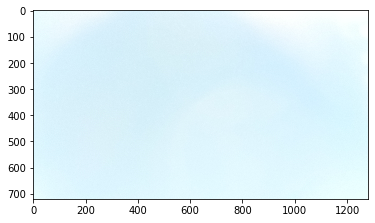

In [58]:
# Plotting the image file

plt.imshow(image_10)

## 2. Standardize cropped images for analysis.

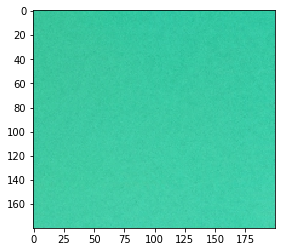

In [59]:
#Cropping Image
#Create a list of all cropped images from the loop

c=[]
for i in range(0,len(images)):
    cropped_image = images[i][540:740,1080:1280, :] # Select 200x200 in the middle of the image
    c.append(cropped_image)
    plt.imshow(cropped_image)

## 3. Getting data from the images.

In [60]:
# Create variable names and oxygen ratios

images_names = ["image_10","image_15","image_20","image_25","image_49","image_76","image_99"]
oxygen_rates = [10, 15, 20, 25, 49, 76, 99]
df_mean=pd.DataFrame(columns = ['images','oxygen_rates','red','green','blue','pixel_intensity'])

#index to get folder name
ind = 0

# For each cropped image, get the images_names, oxygen_rates, and RGB values to store in a data frame 
for crop_image in c:
    #image index
    img = c[ind]
        
    #oxygen rates
    oxygen = oxygen_rates[ind]
    
    #image names
    image = images_names[ind]
        

    # Extract mean data in separate variable for manipulation
    red = crop_image[:, :, 0].mean() #Extract mean of red pixel values
    green = crop_image[:, :, 1].mean() #Extract mean of green pixel values
    blue = crop_image[:, :, 2].mean() #Extract mean of blue pixel values


    #separate values as list, so we can append it!
    #values = [image_names,oxygen_rates,red,green,blue]
    df_mean = df_mean.append({'images':image, 'red':red,
                              "green":green,'blue':blue, 'oxygen_rates':oxygen},ignore_index=True)


    #add index, to get the proper folder name!
    ind = ind + 1
        

## 4. Combining the rgb values in the output.

In [61]:
#Create the variable Pixel intensity - Sum of RGB  
df_mean["pixel_intensity"]= df_mean[["red", "green", "blue"]].sum(axis='columns')

#Rounding the Data Frame values
df_mean.round(decimals=2)

,images,oxygen_rates,red,green,blue,pixel_intensity
0,image_10,10,228.73,251.63,254.40,734.77
1,image_15,15,172.89,216.07,222.14,611.09
2,image_20,20,115.53,153.83,171.67,441.03
3,image_25,25,63.09,100.96,109.58,273.62
4,image_49,49,5.36,61.54,38.02,104.92
5,image_76,76,40.01,171.23,128.81,340.05
6,image_99,99,59.64,202.37,163.82,425.83


## 5. Plotting the relation between oxygen and pixels.

([<matplotlib.axis.YTick at 0x1a2cba1410>,
 <a list of 5 Text yticklabel objects>)

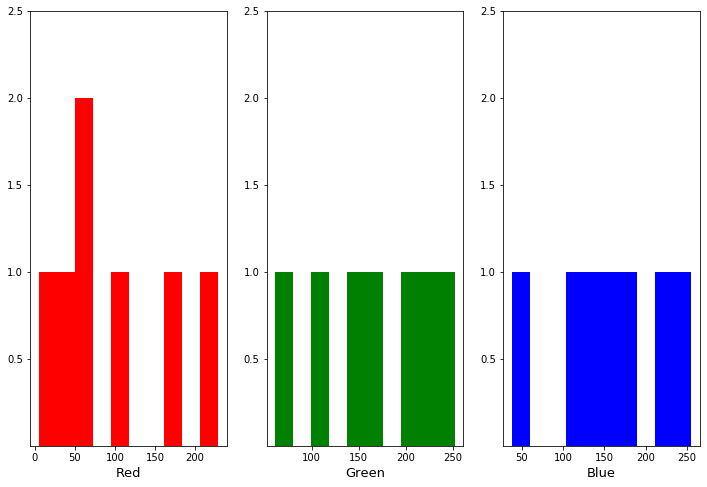

In [62]:
# Plotting histograms to analize the rgb data in single bands
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.hist(df_mean['red'],color= 'r')
plt.xlabel("Red", size=13) # Adding axis x label for red band and its size
plt.yticks([0.5,1,1.5,2,2.5]) # Adjusting the y axis scale for red band

plt.subplot(1,3,2)
plt.hist(df_mean['green'],color= 'g')
plt.xlabel("Green", size=13) # Adding axis x label for green band and its size
plt.yticks([0.5,1,1.5,2,2.5]) # Adjusting the y axis scale for green band

plt.subplot(1,3,3)
plt.hist(df_mean['blue'],color= 'b')
plt.xlabel("Blue", size=13) # Adding axis x label for blue band and its size
plt.yticks([0.5,1,1.5,2,2.5]) # Adjusting the y axis scale for blue band

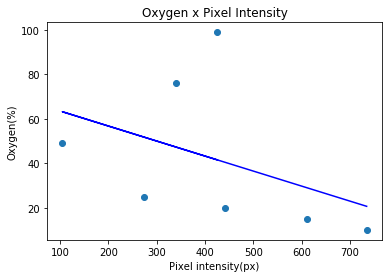

In [66]:
# Compare Oxygen and Pixel intensity with

x = np.array(df_mean["pixel_intensity"]) #Generate data
y = np.array(df_mean["oxygen_rates"])
plt.plot(x, y, 'o') #Create scatter plot
m, b=np.polyfit(x, y, 1) # Adding line that best fits
plt.plot(x, m*x + b, color='b') # m =slope, b =intercept

# Adjusting graph 

plt.plot(color=blue) # Plotting the graph
plt.xlabel('Pixel intensity(px)') # Defining the axis (x,y)
plt.ylabel('Oxygen(%)') 
plt.title("Oxygen x Pixel Intensity") # Adding title
plt.savefig("../Output/Project-Image.png") # Output - Save the graph to .png object

In [64]:
# Fit linear model using linregress

df_mean[["oxygen_rates"]] = df_mean[["oxygen_rates"]].apply(pd.to_numeric)
x= df_mean["pixel_intensity"]
y= df_mean["oxygen_rates"]
fit_info = stats.linregress(x, y)

# Display individual parameters

print('slope:',fit_info.slope)
print('intercept:',fit_info.intercept)
print('r:',fit_info.rvalue)
print('r-squared:',fit_info.rvalue**2)
print('p-value:',fit_info.pvalue)

slope: -0.0676324779390636
intercept: 70.32168735865642
r: -0.4152667772644018
r-squared: 0.1724464962995623
p-value: 0.3542004169475256


In [49]:
# Output - Save dataframe to .csv object

df_mean.to_csv("../Output/df_Project-Image.csv")